In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | swan hill
Processing Record 7 of Set 1 | marzuq
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | karamay
City not found. Skipping...
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | jalu
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | pevek
P

Processing Record 38 of Set 4 | coahuayana
Processing Record 39 of Set 4 | anito
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | wenling
Processing Record 46 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 47 of Set 4 | jatai
Processing Record 48 of Set 4 | jamsa
Processing Record 49 of Set 4 | trairi
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | aberdeen
Processing Record 2 of Set 5 | khandbari
Processing Record 3 of Set 5 | rovaniemi
Processing Record 4 of Set 5 | steamboat springs
Processing Record 5 of Set 5 | besikduzu
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | port hedland
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | gritsovskiy
Processin

Processing Record 28 of Set 8 | jurado
Processing Record 29 of Set 8 | peru
Processing Record 30 of Set 8 | kahramanmaras
Processing Record 31 of Set 8 | hit
Processing Record 32 of Set 8 | blagoyevo
Processing Record 33 of Set 8 | kiama
Processing Record 34 of Set 8 | dothan
Processing Record 35 of Set 8 | maryville
Processing Record 36 of Set 8 | santa catarina de tepehuanes
Processing Record 37 of Set 8 | yomitan
City not found. Skipping...
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | nouadhibou
Processing Record 40 of Set 8 | binabalian
Processing Record 41 of Set 8 | laguna
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | oktyabrskiy
Processing Record 44 of Set 8 | panguna
Processing Record 45 of Set 8 | mackay
Processing Record 46 of Set 8 | visimo-utkinsk
City not found. Skipping...
Processing Record 47 of Set 8 | gueugnon
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 49 of Set 8 | kjustendil


Processing Record 15 of Set 12 | kisangani
Processing Record 16 of Set 12 | avare
Processing Record 17 of Set 12 | ribeira grande
Processing Record 18 of Set 12 | boulder
Processing Record 19 of Set 12 | vryburg
Processing Record 20 of Set 12 | camacha
Processing Record 21 of Set 12 | luderitz
Processing Record 22 of Set 12 | bodden town
Processing Record 23 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 24 of Set 12 | broken hill
Processing Record 25 of Set 12 | locri
Processing Record 26 of Set 12 | biak
Processing Record 27 of Set 12 | naze
Processing Record 28 of Set 12 | lindi
Processing Record 29 of Set 12 | houlung
City not found. Skipping...
Processing Record 30 of Set 12 | nalut
Processing Record 31 of Set 12 | santiago del estero
Processing Record 32 of Set 12 | ugoofaaru
Processing Record 33 of Set 12 | marawi
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | north platte
Processing Record 36 of Set 12 | pemberton
Processi

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,66.61,53,100,6.02,US,2022-02-11 00:43:54
1,Cape Town,-33.9258,18.4232,64.27,73,0,6.91,ZA,2022-02-11 00:50:02
2,Bredasdorp,-34.5322,20.0403,54.28,87,0,0.00,ZA,2022-02-11 00:50:51
3,Yar-Sale,66.8333,70.8333,6.60,90,76,17.72,RU,2022-02-11 00:50:52
4,Swan Hill,-35.3378,143.5544,74.88,29,46,13.89,AU,2022-02-11 00:50:52
5,Marzuq,14.4000,46.4667,58.28,41,6,0.51,YE,2022-02-11 00:50:52
6,Jamestown,42.0970,-79.2353,32.29,68,100,9.22,US,2022-02-11 00:46:05
7,Caravelas,-17.7125,-39.2481,76.01,90,9,5.95,BR,2022-02-11 00:50:07
8,Pisco,-13.7000,-76.2167,73.45,68,0,16.11,PE,2022-02-11 00:43:07
9,Ushuaia,-54.8000,-68.3000,44.08,91,96,4.90,AR,2022-02-11 00:50:53


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-02-11 00:43:54,28.0170,-97.5169,66.61,53,100,6.02
1,Cape Town,ZA,2022-02-11 00:50:02,-33.9258,18.4232,64.27,73,0,6.91
2,Bredasdorp,ZA,2022-02-11 00:50:51,-34.5322,20.0403,54.28,87,0,0.00
3,Yar-Sale,RU,2022-02-11 00:50:52,66.8333,70.8333,6.60,90,76,17.72
4,Swan Hill,AU,2022-02-11 00:50:52,-35.3378,143.5544,74.88,29,46,13.89
...,...,...,...,...,...,...,...,...,...
552,Kushima,JP,2022-02-11 01:06:07,31.4583,131.2333,51.84,58,4,2.06
553,Qeshm,IR,2022-02-11 01:06:07,26.9581,56.2719,68.86,54,0,3.98
554,Kyra,RU,2022-02-11 01:06:07,49.5776,111.9753,-6.86,85,93,5.57
555,Ligayan,PH,2022-02-11 01:06:08,4.6533,119.4706,80.33,81,100,3.38


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

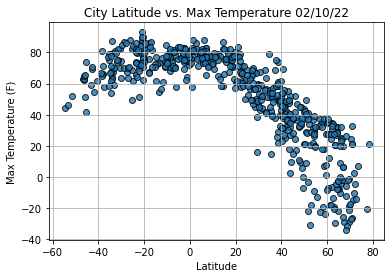

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

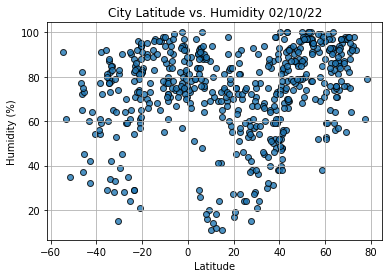

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

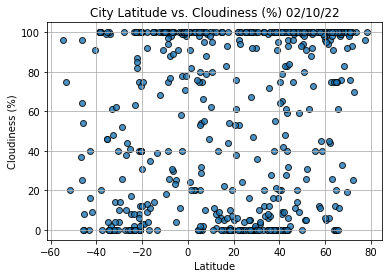

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

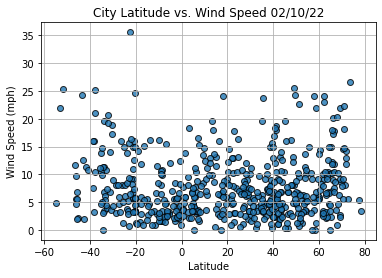

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2022-02-11 00:50:54
Lat                       -33.918
Lng                       25.5701
Max Temp                    62.89
Humidity                       82
Cloudiness                      0
Wind Speed                   3.44
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2022-02-11 00:43:54,28.0170,-97.5169,66.61,53,100,6.02
3,Yar-Sale,RU,2022-02-11 00:50:52,66.8333,70.8333,6.60,90,76,17.72
5,Marzuq,YE,2022-02-11 00:50:52,14.4000,46.4667,58.28,41,6,0.51
6,Jamestown,US,2022-02-11 00:46:05,42.0970,-79.2353,32.29,68,100,9.22
14,Jalu,LY,2022-02-11 00:50:55,29.0331,21.5482,49.89,57,0,6.20


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

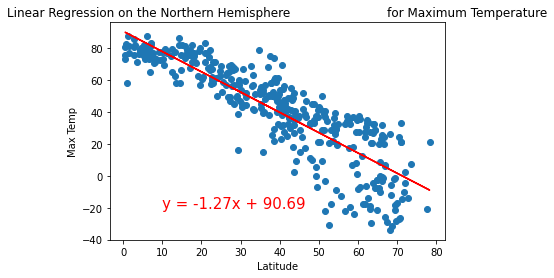

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

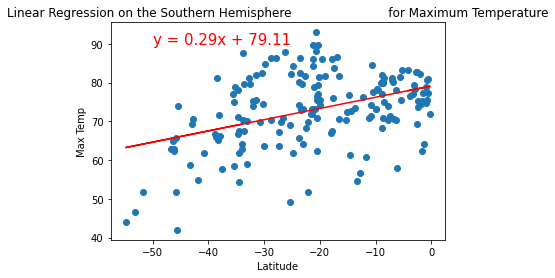

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

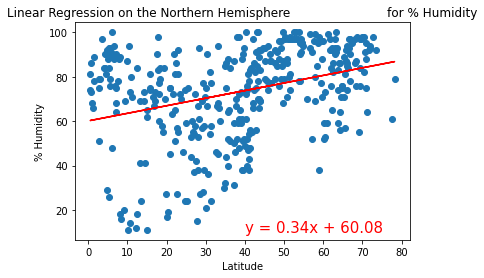

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

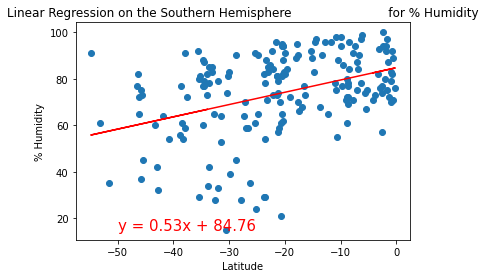

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

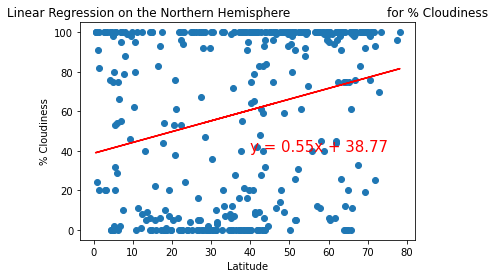

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

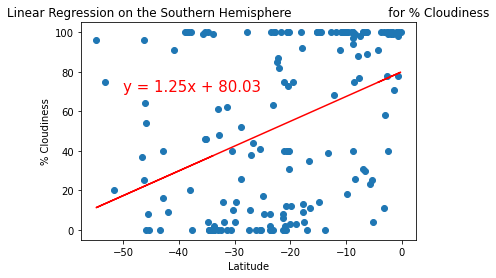

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,70))

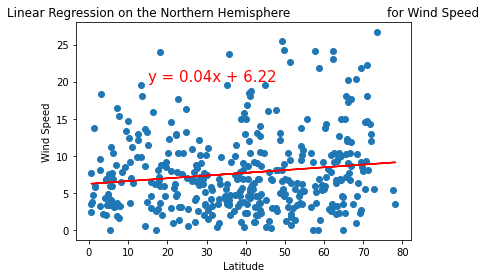

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(15,20))

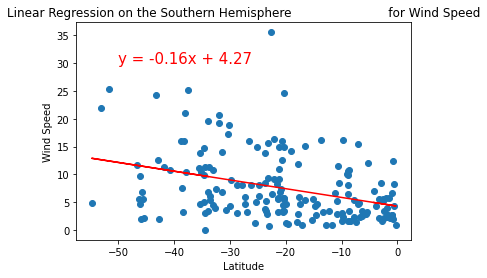

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))